In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# increase the font size
plt.rcParams.update({'font.size': 18})
import matplotlib.ticker as ticker
import leptonintegral as li
import sid
import constants as c
import constraints
import standardmodel as sm
import darksector as ds
import pickle
from scipy import interpolate, special

# Lepton Integral 

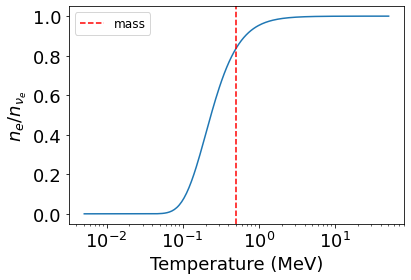

Asymptotic value=0.09134361552056273 T^3


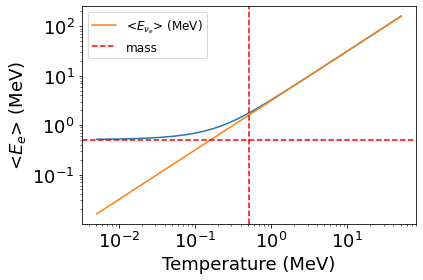

Asymptotic value=3.1513743717389078 T


In [20]:
# Check for the electron neutrino

factors = []
T_domain = c.m_e*np.logspace(-2, 2, 251)
for T in T_domain:
    factors.append(sid.n_lepton(T, 'electron')/sid.n_nu(T))
plt.semilogx(T_domain, factors)
plt.ylabel(r"$n_e/n_{\nu_e}$")
plt.xlabel("Temperature (MeV)")
plt.axvline(c.m_e, ls='--', c='r', label='mass')
plt.legend(fontsize=12)
plt.show()
print("Asymptotic value={} T^3".format(sid.n_lepton(100*c.m_e, 'electron')/(100*c.m_e)**3))

plt.figure()
plt.loglog(T_domain, sid.E_avg_lepton_single(T_domain, c.m_e))
plt.loglog(T_domain, sid.E_avg_nu(T_domain), label=r'<$E_{\nu_e}$> (MeV)')

plt.xlabel("Temperature (MeV)")
plt.ylabel(r"<$E_e$> (MeV)")
plt.axvline(c.m_e, ls='--', c='r', label='mass')
plt.axhline(c.m_e, ls='--', c='r')
plt.legend(fontsize=12)
plt.show()
print("Asymptotic value={} T".format(sid.E_avg_nu(100*c.m_e)/(100*c.m_e)))

# Matter Potential

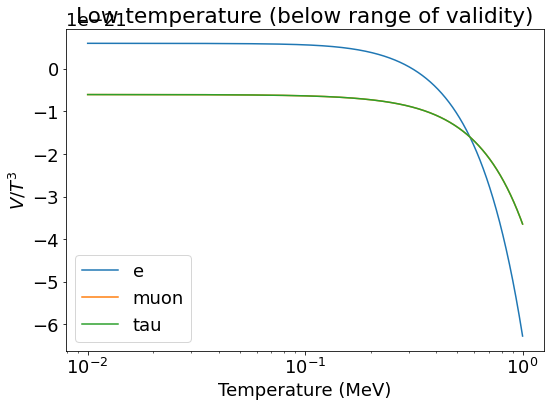

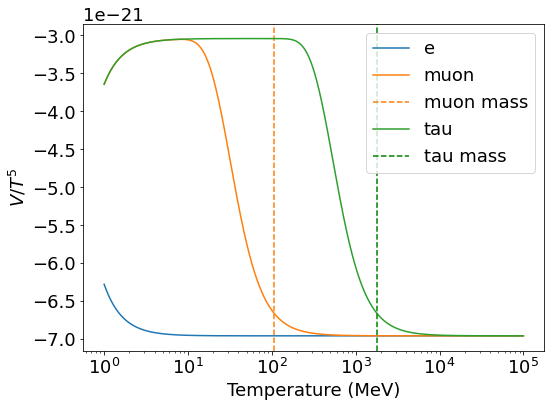

In [15]:
poverT = 1
T_domain = np.linspace(0.01, 1, 1000)
plt.figure(figsize=(8,6))
plt.title(r"Low temperature (below range of validity)")
plt.semilogx(T_domain, sid.matter_potential(poverT*T_domain, T_domain, 'electron', antineutrino=False)/poverT*T_domain**3, label='e')
plt.semilogx(T_domain, sid.matter_potential(poverT*T_domain, T_domain, 'muon', antineutrino=False)/poverT*T_domain**3, label='muon')
plt.semilogx(T_domain, sid.matter_potential(poverT*T_domain, T_domain, 'muon', antineutrino=False)/poverT*T_domain**3, label='tau')
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"$V/T^3$")
plt.tight_layout()
plt.legend()
plt.show()


T_domain = np.logspace(0, 5, 1000)
plt.figure(figsize=(8,6))
plt.semilogx(T_domain, sid.matter_potential(poverT*T_domain, T_domain, 'electron', antineutrino=False)/poverT*T_domain**5, label='e')
plt.semilogx(T_domain, sid.matter_potential(poverT*T_domain, T_domain, 'muon', antineutrino=False)/poverT*T_domain**5, label='muon')
plt.axvline(c.m_mu, ls='--', c='tab:orange', label='muon mass')
plt.semilogx(T_domain, sid.matter_potential(poverT*T_domain, T_domain, 'tau', antineutrino=False)/poverT*T_domain**5, label='tau')
plt.axvline(c.m_tau, ls='--', c='g', label='tau mass')
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"$V/T^5$")
plt.tight_layout()
plt.legend()
plt.show()

# Scale factor vs Time

In [ ]:
# Load the data from data/T_SM_vs_a.pkl
with open("data/T_SM_vs_a.pkl", 'rb') as file:
    T_SM_vs_a_results = pickle.load(file)
T_SM_entropy_func = interpolate.interp1d(T_SM_vs_a_results['a_domain'], T_SM_vs_a_results['T_domain_entropy'])
T_SM_energy_func = interpolate.interp1d(T_SM_vs_a_results['a_domain'], T_SM_vs_a_results['T_domain_energy'])
a_vs_T_SM_entropy_func = interpolate.interp1d(T_SM_vs_a_results['T_domain_entropy'], T_SM_vs_a_results['a_domain'])

In [ ]:
a_domain = np.logspace(0, 6.1, 10**3)
T_domain_entropy = T_SM_entropy_func(a_domain)
T_domain_energy = T_SM_energy_func(a_domain)

fig, ax = plt.subplots(figsize=(8,6))
ax.semilogx(a_domain, T_domain_entropy*a_domain/T_domain_entropy[0], '.', label=r'Entropy conservation')
ax.semilogx(a_domain, T_domain_energy*a_domain/T_domain_energy[0], '.', label=r'Covariant energy conservation')
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xscale('log')
num_ticks = 4
top_ticks = a_domain[::len(a_domain)//num_ticks]
top_ticklabels = ['{:.0e}'.format(label) for label in T_domain_entropy[::len(T_domain_entropy)//num_ticks]]
ax2.xaxis.set_major_locator(ticker.FixedLocator(top_ticks))
ax2.xaxis.set_major_formatter(ticker.FixedFormatter(top_ticklabels))
ax2.set_xlabel(r"$T_{SM}$ (entropy calc) (MeV)")
ax.set_xlabel("Scale factor (arb units)")
ax.set_ylabel(r"$a T_{SM}$ (normalized)")
ax.axvline(a_vs_T_SM_entropy_func(c.T_qcd), c='r', ls='--', label='QCD transition')

ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

# SM Thermodynamics

### Load the data

In [ ]:
# Load the data
with open("data/SM_thermodynamic_quantities.pkl", 'rb') as file:
    data = pickle.load(file)

hubble_rate_func = interpolate.interp1d(data['T_domain'], data['hubble_rate'])
SM_energy_density_func = interpolate.interp1d(data['T_domain'], data['energy_density'])
SM_pressure_func = interpolate.interp1d(data['T_domain'], data['pressure'])
SM_entropy_density_func = interpolate.interp1d(data['T_domain'], data['entropy_density'])
SM_drho_dT_func = interpolate.interp1d(data['T_domain'], data['drho_dT'])

### Plot the evolution of energy density, pressure, entropy

In [ ]:
T_domain = np.logspace(6, 0, 1000)

approx_dofs = [sm.compute_SM_relativistic_dof_approx(T) for T in T_domain]
plt.figure(figsize=(8,6))
plt.ylabel(r"$g^{eff}_{SM}(T)$")
plt.xlabel("T (MeV)")
plt.semilogx(T_domain, approx_dofs, label='discrete approximation')
plt.semilogx(T_domain, SM_energy_density_func(T_domain)/(T_domain**4*np.pi**2/30), label=r'$\rho$')
plt.semilogx(T_domain, SM_pressure_func(T_domain)/(T_domain**4*np.pi**2/90), label='pressure')
plt.semilogx(T_domain, SM_drho_dT_func(T_domain)/(4*(np.pi**2/30)*T_domain**3), label=r'$d\rho /dT$')
plt.semilogx(T_domain, SM_entropy_density_func(T_domain)/((4/3.)*(np.pi**2/30)*T_domain**3), label='entropy_density')
# Reverse the x-axis
plt.gca().invert_xaxis()
plt.legend(fontsize=12)
plt.show()    

### dTemperature/dtime

In [ ]:
T_domain = np.logspace(6, 0, 100)
dT_dtime = sm.dTemperature_dtime(T_domain, hubble_rate_func, SM_energy_density_func, SM_pressure_func, SM_drho_dT_func)

plt.figure(figsize=(7,6))
plt.semilogx(1/T_domain, -1*dT_dtime/(hubble_rate_func(T_domain)*T_domain))
plt.xlabel(r"1/T (MeV$^{-1}$)")
plt.ylabel(r"(dT/dt)/HT")
plt.show()

## Check the energy density, pressure, and drho/dT integrals

In [ ]:
m = 1
temps = m*np.logspace(-2.1, 2.1, 100)

plt.figure(figsize=(8,6))
plt.title("energy density")
rho = [sm.compute_energy_density(T, m, 1)/T**4 for T in temps]    
plt.semilogx(temps/m, rho, label="fermi-dirac")
plt.axhline((7/8.)*np.pi**2/30, label="fermi-dirac limit")

rho = [sm.compute_energy_density(T, m, -1)/T**4 for T in temps]
plt.semilogx(temps/m, rho, c='r', label="bose-einstein")
plt.axhline(np.pi**2/30, c='r', label="bose-einstein limit")
plt.legend(fontsize=12)
plt.xlabel("T/m")
plt.ylabel(r"$\rho/T^4$")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Pressure")
pres = [sm.compute_pressure(T, m, 1)/T**4 for T in temps]    
plt.semilogx(temps/m, pres, label="fermi-dirac")
plt.axhline((1/3.)*(7/8.)*np.pi**2/30, label="fermi-dirac limit")

pres = [sm.compute_pressure(T, m, -1)/T**4 for T in temps]    
plt.semilogx(temps/m, pres, c='r', label="bose-einstein")
plt.axhline((1/3.)*np.pi**2/30, c='r', label="bose-einstein limit")
plt.legend(fontsize=12)
plt.xlabel("T/m")
plt.ylabel(r"$P/T^4$")
plt.show()

plt.figure(figsize=(8,6))
plt.title(r"$d \rho/dT$")
drdT = [sm.compute_drho_single_dT(T, m, 1)/T**3 for T in temps]    
plt.semilogx(temps/m, drdT, label="fermi-dirac")
plt.axhline(4*(7/8.)*np.pi**2/30, label="fermi-dirac limit")

drdT = [sm.compute_drho_single_dT(T, m, -1)/T**3 for T in temps]    
plt.semilogx(temps/m, drdT, c='r', label="bose-einstein")
plt.axhline(4*np.pi**2/30, c='r', label="bose-einstein limit")
plt.legend(fontsize=12)
plt.xlabel("T/m")
plt.ylabel(r"$\left( d \rho/dT \right)/T^3$")
plt.show()


## Check that drho/dT sums correctly

In [ ]:
Toverm_max = 10
increment = 0.01
temps = m*np.arange(0.01, Toverm_max, increment)
drdT = [sm.compute_drho_single_dT(T, m, -1) for T in temps]
drdT_rhos = [m*increment*np.sum(drdT[:i]) for i in range(len(drdT))]
rhos = [sm.compute_energy_density(T, m, -1) for T in temps]
plt.plot(temps/m, drdT_rhos, label=r"Summing $d\rho/dT$")
plt.plot(temps/m, rhos, label=r'$\rho$')
plt.xlabel("T/m")
plt.ylabel(r"$\rho$")
plt.legend()
plt.show()
print("rho={}, summing drhodT check={}".format(sm.compute_energy_density(Toverm_max*m, m, -1), m*increment*np.sum(drdT)))

# Scattering-induced decoherence

## $d \rho_{inj} / dt$

In [ ]:
T_SM= np.logspace(0, 4, 100)
ms = 10
theta = 10**-10
flavor='electron'
# Plot the SID energy injection rate
plt.figure(figsize=(8,6))
plt.loglog(T_SM, sid.compute_drho_injected_dt(T_SM, ms, theta, flavor, merle_simplification=True, antineutrino=False))
plt.xlabel("T_SM (MeV)")
plt.ylabel(r"$d\rho/dt$ (MeV$^4$/s)")
plt.show()

## Active Neutrino Scattering Coefficients

### T < 10 GeV

In [ ]:
# Compare to figure 1 and 2 here: http://www.laine.itp.unibe.ch/neutrino-rate/imSigma.pdf

T_domain = np.linspace(1, 10**4, 10**3)
for flavor in ['electron', 'muon', 'tau']:
    plt.figure(figsize=(5,5))
    for qoverT in [1, 3, 6, 9]:
        plt.semilogx(T_domain, sid.scattering_coeffs_1Mev_to_5_GeV(T_domain, qoverT*T_domain, flavor), label='q/T={}'.format(qoverT))
    plt.ylabel(r"$C_\alpha$")
    plt.xlabel("T (MeV)")
    plt.title(flavor)
    plt.yticks(np.arange(0, 12, 1))
    plt.grid()
    plt.legend()
    plt.show()

# Compare to figure 10 in Dodelson-Widrow production of sterile neutrino DM with non-trivial initial abundance

plt.figure(figsize=(7,7))
qoverT = 6
for flavor in ['electron', 'muon', 'tau']:
    plt.semilogx(T_domain, sid.scattering_coeffs_1Mev_to_5_GeV(T_domain, qoverT*T_domain, flavor), label=flavor)
plt.ylabel(r"$C_\alpha$")
plt.xlabel("T (MeV)")
plt.xticks(10**np.arange(0, 5, 1))
plt.yticks(np.arange(0, 12, 1))
plt.grid()
plt.legend()
plt.show()



### T > 5 GeV

In [ ]:

# Compare to fig. 6 in https://arxiv.org/pdf/1605.07720.pdf
T_domain = np.linspace(5*10**3, 150*10**3, 1000)
flavor='electron'

plt.figure(figsize=(6,6))
for qoverT in [1, 2, 3, 6, 9]:
    plt.semilogy(T_domain*10**-3, sid.active_scattering_rate(qoverT*T_domain, T_domain, flavor)/T_domain, label='q/T={}'.format(qoverT))
plt.ylabel(r"$\Gamma/T$")
plt.xlabel("T (GeV)")
plt.xticks(30*np.arange(1, 6, 1))
#plt.yticks(np.arange(0, 12, 1))
plt.ylim(10**-4, 3*10**-1)
plt.grid()
plt.legend()
plt.show()



# Conversion to $\Omega_m$

In [ ]:
# CMB number sanity check: should be 411 photons per cm^-3 and Omega_cmb = 5.38*10*-5
# https://pdg.lbl.gov/2020/reviews/rpp2020-rev-cosmic-microwave-background.pdf
fint = 2*special.zeta(3)
gphoton=2
ndens_cmb = sid.fint_to_n(2*fint, c.Tcmb)
print("Number of photons per cm^-3 {}".format(ndens_cmb*c.MeVtoinversecm**3))
rho_cmb = gphoton*c.Tcmb**4*(np.pi**4/15.)/(2*np.pi**2)
print("omega_cmb = {}".format(ds.rho_to_omegahsq(rho_cmb)/c.hubble**2))

In [ ]:
# CnuB sanity check: see equation 25.2 here: https://pdg.lbl.gov/2019/reviews/rpp2019-rev-neutrinos-in-cosmology.pdf

g_nu = 2 #per flavor
fint = 1.5*special.zeta(3)
Tnu = c.Tcmb*(4./11)**(1/3.)
ndens_nu = sid.fint_to_n(g_nu*fint, Tnu)
print("Number of neutrinos per flavor per cm^-3 {}".format(ndens_nu*c.MeVtoinversecm**3))

sum_mnu = 93.15*c.eVtoMeV
print("omega_cnub h^2 for sum_mnu = 93.15eV {}".format(ds.rho_to_omegahsq(sum_mnu*ndens_nu)))



# Decay Rates

In [ ]:
# Check the coefficients of the decay rates against section 4 of Fuller, Kishimoto, and Kusenko 
print(c.Gf**2/(192*np.pi**3)*c.MeVtoHz) # decay_rate_3nu
print(9*c.Gf**2*c.fine_structure/(512*np.pi**4)*c.MeVtoHz) # decay_rate_nu_photon
print(c.Gf**2*c.f_pion_decay**2*c.m_pi0**3/(16*np.pi)*c.MeVtoHz) # decay_rate_nu_pi0
print(c.Gf**2*c.f_pion_decay**2/(16*np.pi)*c.MeVtoHz) # decay_rate_pipm_e
# I think the numbers in equation 6/7 are wrong in the paper, the way they've defined x and y is different
# than equation 5, they didn't factor out the pion mass, but they acted like they did when computing the coefficient
# Here's the coefficient with the pion mass factored out (incorrectly, but the same as the paper)
print(c.Gf**2*c.f_pion_decay**2*c.m_pipm**3/(16*np.pi)*c.MeVtoHz) # decay_rate_pipm_e with pion mass factored out

## Figure 2 in Fuller, Kishimoto, Kusenko

In [ ]:
# Plot sterile neutrino lifetime contours as a function of mass and mixing angle, with sinsq2theta on the x-axis and mass on the y-axis
ms = np.linspace(150, 380, 100)
sinsq2thetas = np.logspace(-12, -9, 80)
ms, sinsq2thetas = np.meshgrid(ms, sinsq2thetas)
lifetimes = 1/(constraints.total_decay_rate(ms, np.arcsin(np.sqrt(sinsq2thetas))/2.)*c.MeVtoHz)

plt.figure(figsize=(6,7))
plt.title(r"$\tau$ (s)")
plt.xlabel(r"$\sin^2 2\theta$")
plt.ylabel("m (MeV)")
levels = [1,5,10,25,40,60,100,150,200,300,500,1000,3000]
contour = plt.contour(sinsq2thetas, ms, lifetimes, levels=levels, colors='red')
plt.clabel(contour, inline=True, fontsize=8, colors='black', fmt='%1.0f')
plt.xscale('log')
plt.show()
